In [29]:
import itertools
import functools
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def get_combinations(x,degree):
    return itertools.combinations_with_replacement(x,degree)


def compute_new_feature(items):
    # reduce(lambda x, y: x*y, [1,2,3,4,5]) calculates ((((1*2)*3)*4)*5)
    return functools.reduce(lambda x,y : x*y, items)



In [7]:
list(get_combinations([1,2,3,4], 4))

[(1, 1, 1, 1),
 (1, 1, 1, 2),
 (1, 1, 1, 3),
 (1, 1, 1, 4),
 (1, 1, 2, 2),
 (1, 1, 2, 3),
 (1, 1, 2, 4),
 (1, 1, 3, 3),
 (1, 1, 3, 4),
 (1, 1, 4, 4),
 (1, 2, 2, 2),
 (1, 2, 2, 3),
 (1, 2, 2, 4),
 (1, 2, 3, 3),
 (1, 2, 3, 4),
 (1, 2, 4, 4),
 (1, 3, 3, 3),
 (1, 3, 3, 4),
 (1, 3, 4, 4),
 (1, 4, 4, 4),
 (2, 2, 2, 2),
 (2, 2, 2, 3),
 (2, 2, 2, 4),
 (2, 2, 3, 3),
 (2, 2, 3, 4),
 (2, 2, 4, 4),
 (2, 3, 3, 3),
 (2, 3, 3, 4),
 (2, 3, 4, 4),
 (2, 4, 4, 4),
 (3, 3, 3, 3),
 (3, 3, 3, 4),
 (3, 3, 4, 4),
 (3, 4, 4, 4),
 (4, 4, 4, 4)]

In [8]:
{items: compute_new_feature(items) for items in get_combinations([1],3)}

{(1, 1, 1): 1}

In [9]:
{items: compute_new_feature(items) for items in get_combinations([2,3], 3)}

{(2, 2, 2): 8, (2, 2, 3): 12, (2, 3, 3): 18, (3, 3, 3): 27}

In [11]:
{items: compute_new_feature(items) for items in get_combinations([1,4], 4)}

{(1, 1, 1, 1): 1,
 (1, 1, 1, 4): 4,
 (1, 1, 4, 4): 16,
 (1, 4, 4, 4): 64,
 (4, 4, 4, 4): 256}

In [12]:
import numpy as np


In [13]:
def polynomial_transform(x, degree, logging = False):
    #convets to feature matrix.
    if x.ndim == 1:
        x = x[:, None]
        
    x_t = x.transpose() # Transpose the feature matrix
    features = [np.ones(len(x))] # populates 1s as first features for each example
    
    if logging:
        print('Input: ',x)
    for degree in range(1, degree+1):
        for items in get_combinations(x_t, degree):
            features.append(compute_new_feature(items)) # combine features in to a new feature
            if logging:
                print(items, ":", compute_new_feature(items))
    if logging:
        print(np.asarray(features).transpose())
        
    return np.asarray(features).transpose()

In [22]:
# testing
x = np.array([1,2,3])
x = x[:, None]
print(x.shape)
print(x)

print(x.transpose().shape)
print(x.transpose())

(3, 1)
[[1]
 [2]
 [3]]
(1, 3)
[[1 2 3]]


In [14]:
polynomial_transform(np.array([2]), 3, logging = True)

Input:  [[2]]
(array([2]),) : [2]
(array([2]), array([2])) : [4]
(array([2]), array([2]), array([2])) : [8]
[[1. 2. 4. 8.]]


array([[1., 2., 4., 8.]])

In [15]:
polynomial_transform(np.array([2,3]), 2 ,logging = True)

Input:  [[2]
 [3]]
(array([2, 3]),) : [2 3]
(array([2, 3]), array([2, 3])) : [4 9]
[[1. 2. 4.]
 [1. 3. 9.]]


array([[1., 2., 4.],
       [1., 3., 9.]])

In [16]:
polynomial_transform(np.array([2,3]), 3 ,logging = True)

Input:  [[2]
 [3]]
(array([2, 3]),) : [2 3]
(array([2, 3]), array([2, 3])) : [4 9]
(array([2, 3]), array([2, 3]), array([2, 3])) : [ 8 27]
[[ 1.  2.  4.  8.]
 [ 1.  3.  9. 27.]]


array([[ 1.,  2.,  4.,  8.],
       [ 1.,  3.,  9., 27.]])

In [25]:
polynomial_transform(np.array([[2,3], [4,5]]), degree = 3, logging = True)

Input:  [[2 3]
 [4 5]]
(array([2, 4]),) : [2 4]
(array([3, 5]),) : [3 5]
(array([2, 4]), array([2, 4])) : [ 4 16]
(array([2, 4]), array([3, 5])) : [ 6 20]
(array([3, 5]), array([3, 5])) : [ 9 25]
(array([2, 4]), array([2, 4]), array([2, 4])) : [ 8 64]
(array([2, 4]), array([2, 4]), array([3, 5])) : [12 80]
(array([2, 4]), array([3, 5]), array([3, 5])) : [ 18 100]
(array([3, 5]), array([3, 5]), array([3, 5])) : [ 27 125]
[[  1.   2.   3.   4.   6.   9.   8.  12.  18.  27.]
 [  1.   4.   5.  16.  20.  25.  64.  80. 100. 125.]]


array([[  1.,   2.,   3.,   4.,   6.,   9.,   8.,  12.,  18.,  27.],
       [  1.,   4.,   5.,  16.,  20.,  25.,  64.,  80., 100., 125.]])

In [26]:
np.array([[2,3], [4,5]])

array([[2, 3],
       [4, 5]])

In [27]:
x_ = np.array([2,3,4])
np.c_[np.ones((3,1)), x_, x_**2, ]

array([[ 1.,  2.,  4.],
       [ 1.,  3.,  9.],
       [ 1.,  4., 16.]])

(3,)

# Non-linear training data generation

Creating a training set where the output set is obtained by first calculating sin(2*pi*x) and then adding a samll random noise having a gaussian distribution

In [32]:
def create_nonlin_training_set(func, sample_size, std):
    x = np.linspace(0,1,sample_size)
    y = func(x) + np.random.normal(scale = std, size = x.shape)
    return x,y

def nonlin(x):
    return np.sin(2 * np.pi * x)

In [36]:
# @title [Visualization]

def visualize_training_data(X_train, y_train):
    points = np.linspace(0, 1, 100)
    output = nonlin(points)
    
    plt.scatter(X_train, y_train, facecolor = 'none', edgecolor='b',
                   s = 50, label = 'training data')
    plt.plot(points, output, c = 'g', label = "$\sin(2\pi x)$")
    plt.xlabel('$x_1$')
    plt.ylabel('y')
    plt.legend()
    plt.show()
    

def visualize_model_fit(X,y, lin_reg, degree):
    # plots trained model along with the data generation functon
    points = np.linspace(0,1,100)
    output = nonlin(points)
    
    if degree > 0:
        plt.scatter(X,y, facecolor = 'none', edgecolor = 'b', s = 50,
                   label = "training data")
        plt.plot(points, output, c = 'g', label = "$\sin\(2\pi x)$")
        
        y_hat = lin_reg.predict(polynomial_trasform(points, degree))
        plt.plot(points, y_hat, c = 'r', label = "$h_mathbf{w}{x}$")
        plt.xlabel('$x_1$')
        plt.ylabel('y')
        plt.ylim(-1.5, 1.5)
        plt.title("M = {}".format(degree)) #, xy = (-0.15, 1)

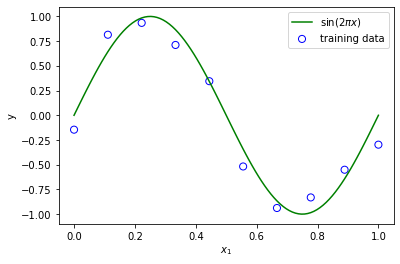

In [42]:
num_samples = 10
X,y = create_nonlin_training_set(nonlin, num_samples, 0.1)
visualize_training_data(X,y)

In [43]:
degree = 2
X_transform = polynomial_transform(X,degree)
lin_reg = LinReg()
lin_reg.fit(X_trainsform, y)
visualize_model_fit(X,y, lin_reg, degree)

NameError: name 'LinReg' is not defined